In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Activation
from tensorflow.python.framework import ops
ops.reset_default_graph()
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn import datasets
import tensorflow_hub as hub
from keras.layers import Dropout
import pandas as pd
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import math
from keras_preprocessing.image import ImageDataGenerator


In [0]:
from keras.datasets.mnist import load_data
(train_digits, train_labels), (test_digits, test_labels) = load_data()

In [0]:
train_digits.shape,train_labels.shape

((60000, 28, 28), (60000,))

In [0]:

train_digits = train_digits.astype('float32')
test_digits = test_digits.astype('float32')
train_digits /= 255
test_digits /= 255


In [0]:
num_classes=10

In [0]:

train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)


In [0]:
train_digits.shape,train_labels.shape

((60000, 28, 28), (60000, 10))

In [0]:
train_digits=train_digits.reshape(-1,28,28,1)
test_digits=test_digits.reshape(-1,28,28,1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))    
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
__________

In [0]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
results = model.fit(train_digits, train_labels, 
                    epochs=15, batch_size=64,validation_data=(test_digits,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 84us/step - loss: 0.0588 - acc: 0.9815 - val_loss: 0.0455 - val_acc: 0.9853
Epoch 2/15
60000/60000 [==============================] - 5s 83us/step - loss: 0.0374 - acc: 0.9883 - val_loss: 0.0280 - val_acc: 0.9908
Epoch 3/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0268 - acc: 0.9916 - val_loss: 0.0244 - val_acc: 0.9922
Epoch 4/15
60000/60000 [==============================] - 5s 82us/step - loss: 0.0207 - acc: 0.9931 - val_loss: 0.0293 - val_acc: 0.9912
Epoch 5/15
60000/60000 [==============================] - 5s 87us/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0348 - val_acc: 0.9895
Epoch 6/15
60000/60000 [==============================] - 5s 91us/step - loss: 0.0145 - acc: 0.9953 - val_loss: 0.0234 - val_acc: 0.9932
Epoch 7/15
60000/60000 [==============================] - 5s 85us/step - loss: 0.0127 - acc: 0.9959 - val_loss: 0.0407 - val_acc

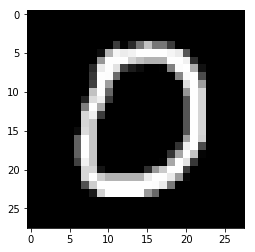

In [0]:
first_image = test_digits[10]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()